# WORK





### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

from sklearn.metrics import mean_squared_error, r2_score


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import missingno as msno

### Read dataset



In [ ]:
# /content/drive/MyDrive/ColabNotebooks/datasets/******.csv
dataset = input('dataset path: ')
df  = pd.read_csv(dataset)

dataset path: /content/drive/MyDrive/ColabNotebooks/datasets/dataset.csv


In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## Columns Handling


### Drop unusable columns

**Columns that contain unique values (i.e ID)**

In [ ]:
unique_columns = df.columns[df.nunique() == df.shape[0]].tolist()
unique_columns

['id']

**Empty Columns (0 valide value all values ar Nan)**

In [ ]:
empty_columns = df.columns[df.isnull().all()].tolist()
empty_columns

[]

**Unusable columns**

In [ ]:
unusable_columns = unique_columns + empty_columns
unusable_columns

['id']

**Drop unusable columns**

In [ ]:
df_usable = df.copy()
df_usable.drop(columns = unusable_columns, axis = 1, inplace = True)

**Drop duplicated rows**

In [ ]:
df_usable.drop_duplicates(inplace=True)

**Dataset for work**

In [ ]:
df_usable

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Separate categorical and numeric columns

**Columns with number of unique values <= 10 are considered categorical**

In [ ]:
categorical_columns = df_usable.columns[df_usable.nunique() <= 10]
categorical_columns.tolist()

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

**Change all categorical calumns type to object**

In [ ]:
df_usable[categorical_columns] = df_usable[categorical_columns].astype("object")
df_usable[categorical_columns].dtypes

gender            object
hypertension      object
heart_disease     object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
stroke            object
dtype: object

**Numeric columns**

In [ ]:
numeric_columns = df_usable.columns[df_usable.dtypes != 'object']
numeric_columns.tolist()

['age', 'avg_glucose_level', 'bmi']

**Columns with missing values**

In [ ]:
columns_with_missing_values = df.columns[df.isna().any()]
columns_with_missing_values.tolist()

['bmi', 'smoking_status']

## Visualisation

### Visualise categorical columns

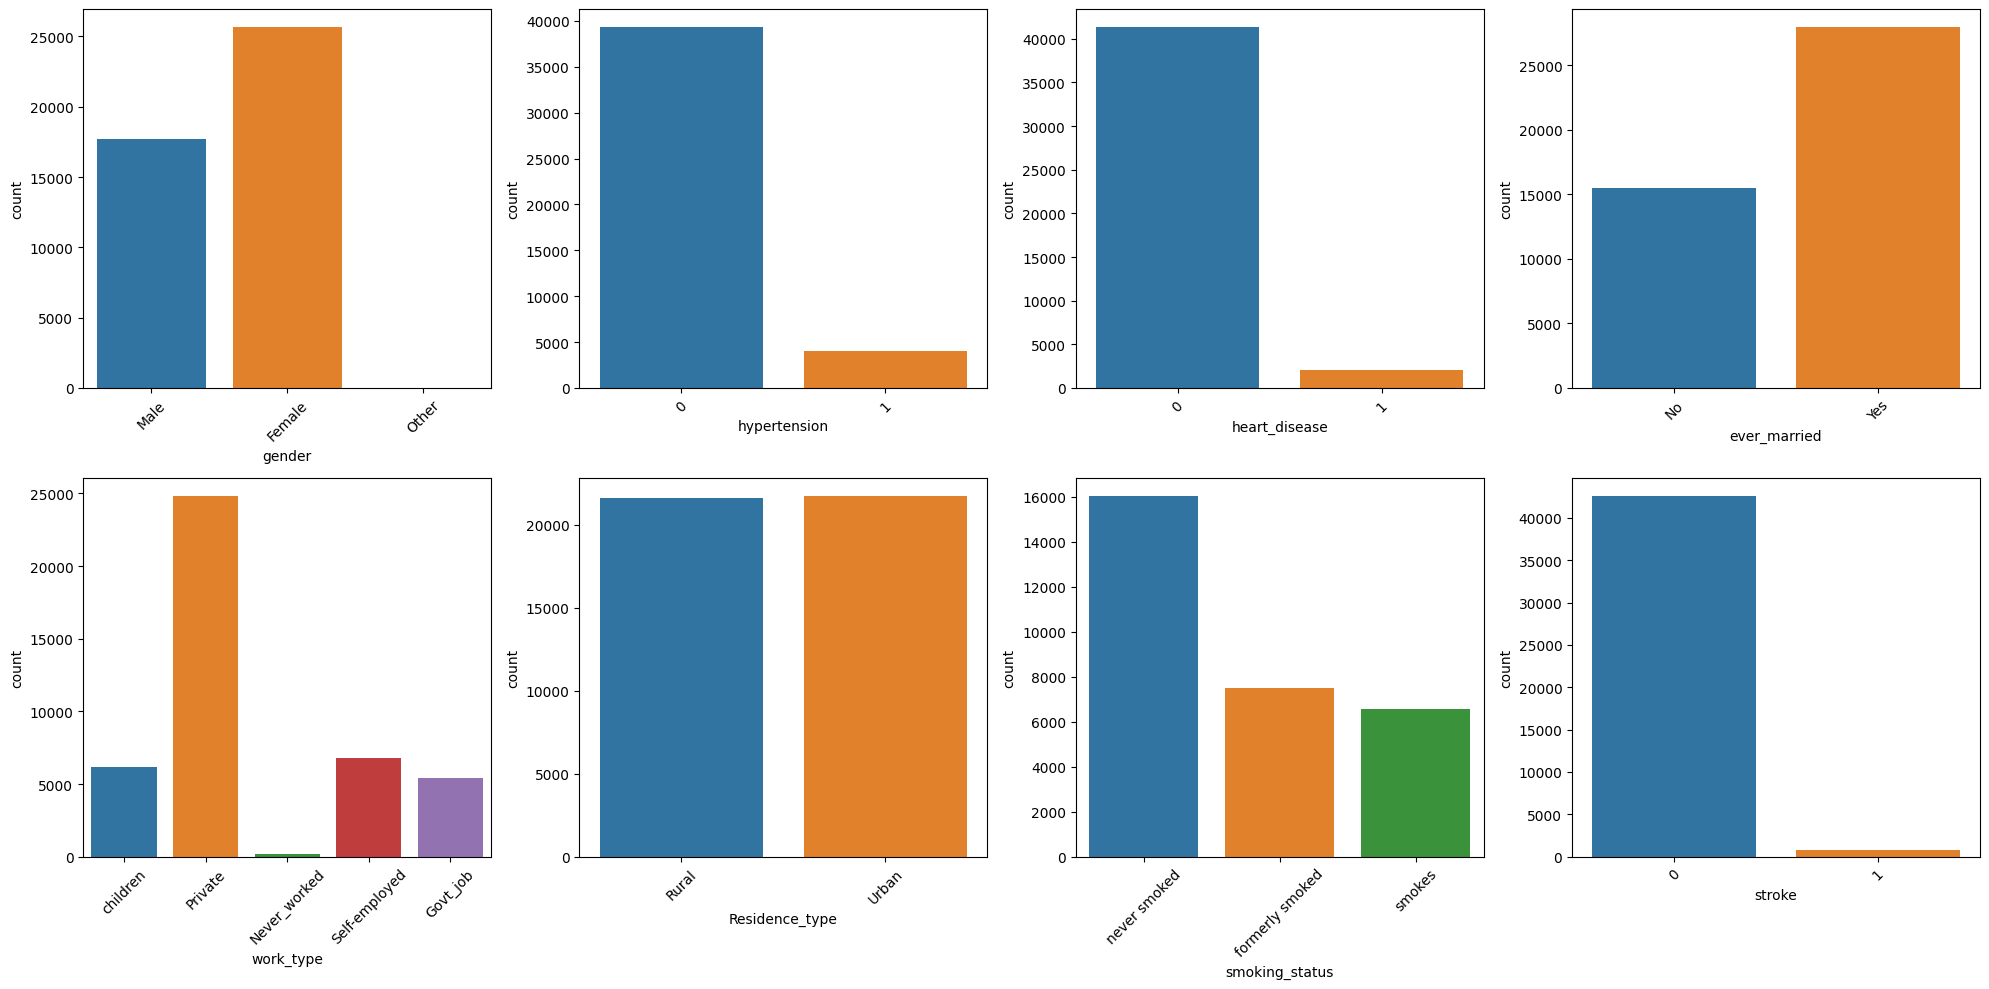

In [ ]:
# # ##### object columns
len_cat = len(categorical_columns)
nc_cat = min(len_cat//2, 4) if len_cat > 4 else min(len_cat, 4)
nr_cat = len_cat // nc_cat

fig, axs = plt.subplots(nrows=nr_cat, ncols=nc_cat, figsize=(nc_cat * 5, nr_cat * 5))

for var, subplot in zip(categorical_columns, axs.flatten()):
    sns.countplot(x=var, data=df_usable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


**Bivariate Analysis for categorical columns**

1: gender
2: hypertension
3: heart_disease
4: ever_married
5: work_type
6: Residence_type
7: smoking_status
8: stroke
Choose the variable to set the bivariate analysis: 5
You choose: work_type


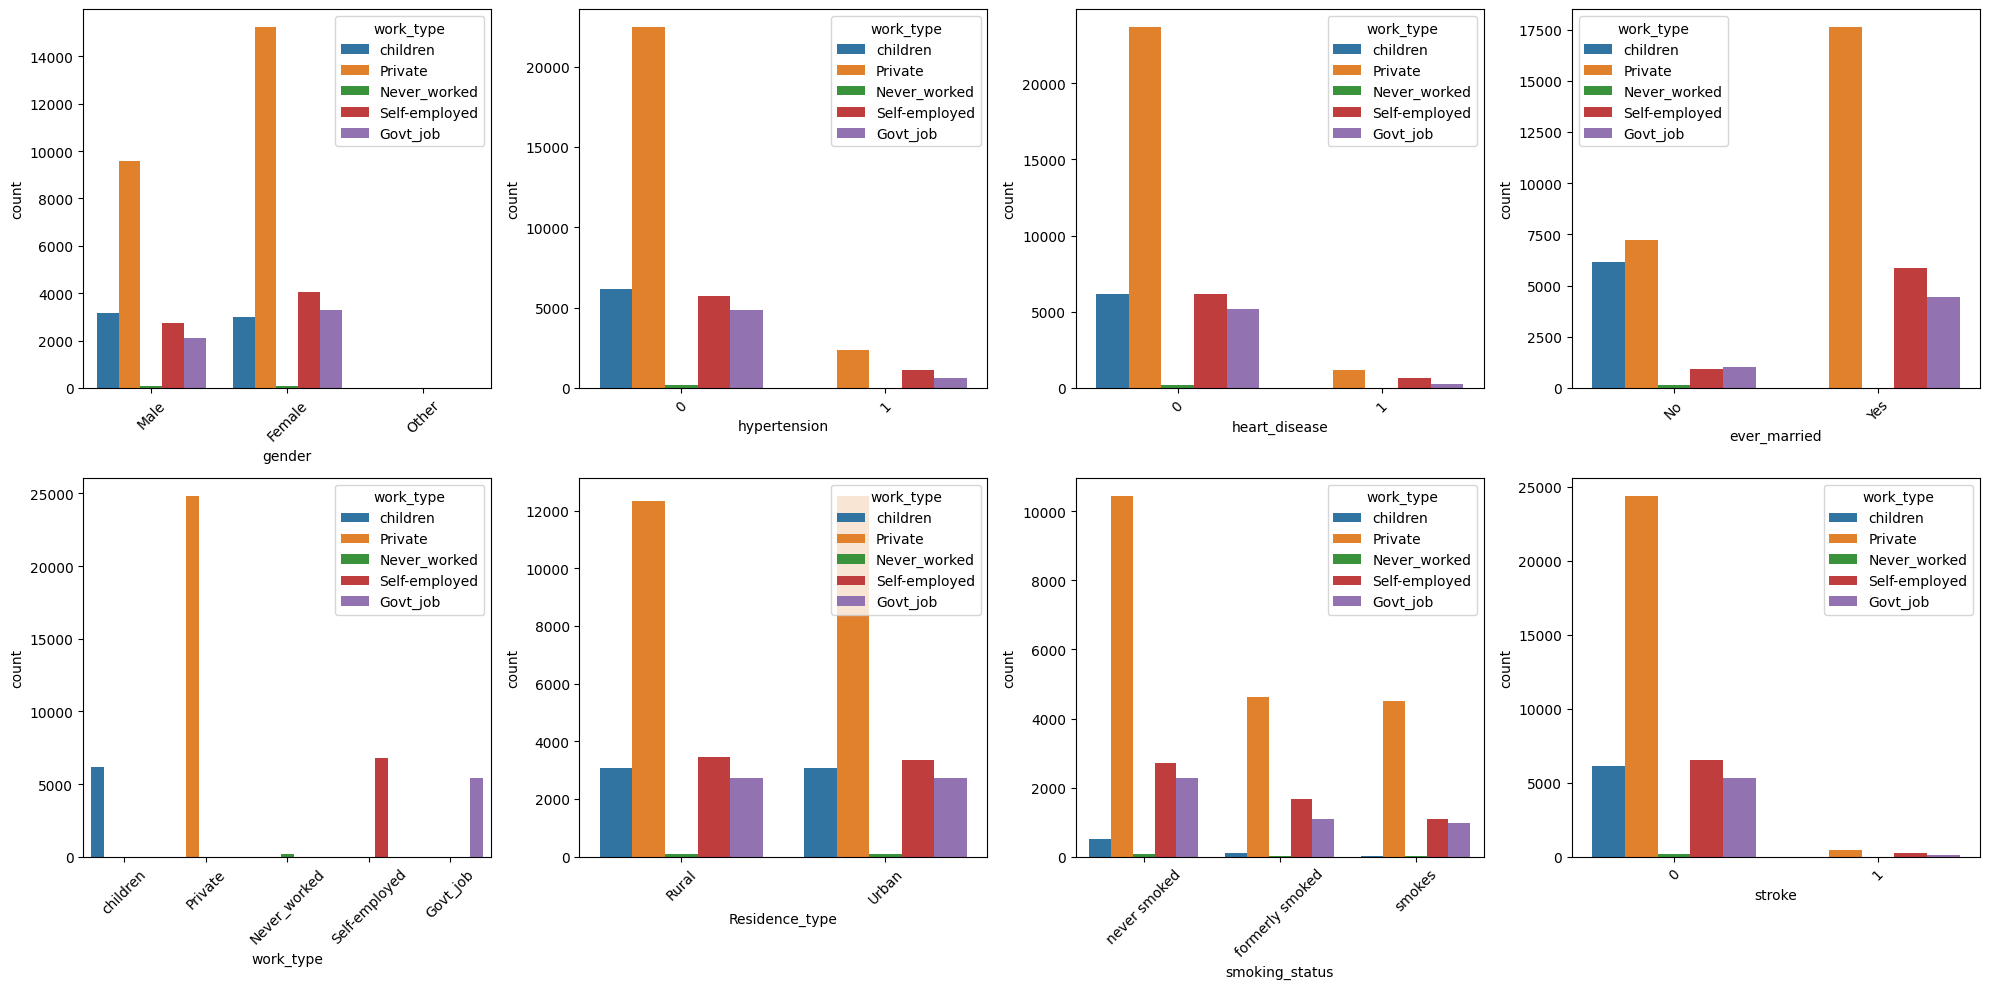

In [ ]:
#Bivariate Analysis
categorical_dict = {i: column for i, column in zip(range(1, len(categorical_columns)+1),categorical_columns)}
for key, value in categorical_dict.items():
    print(f"{key}: {value}")
ch = int(input('Choose the variable to set the bivariate analysis: '))
vr = categorical_dict[ch]
font_size_large = '\033[1;33m'  # Large font size
print(f"You choose: {font_size_large}{vr}")

fig, axs = plt.subplots(nrows=nr_cat, ncols=nc_cat, figsize=(nc_cat*5, nr_cat*5))

for var, subplot in zip(categorical_columns, axs.flatten()):
    sns.countplot(x=df_usable[var], hue=df_usable[vr], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

### Visualise numeric columns

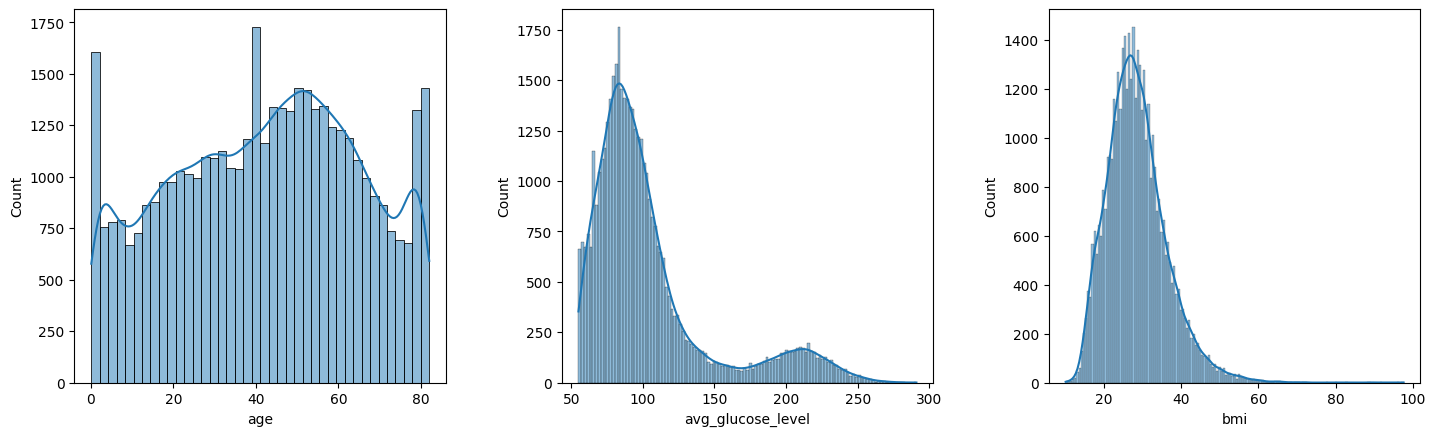

In [ ]:
# # #### numeric columns
len_num = len(numeric_columns)
nc_num = min(len_num//2, 4) if len_num > 4 else min(len_num, 4)
nr_num = len_num // nc_num

fig, axs = plt.subplots(ncols=nc_num, nrows=nr_num, figsize=(nc_num * 5, nr_num * 5))

for var, subplot in zip(numeric_columns, axs.flatten()):
    sns.histplot(df[var], kde=True, ax=subplot)

plt.tight_layout(pad=3)
plt.show()


**Bivariate Analysis for numeric columns**

1: gender
2: hypertension
3: heart_disease
4: ever_married
5: work_type
6: Residence_type
7: smoking_status
8: stroke
Choose the variable to set the bivariate analysis: 2
You chose: hypertension


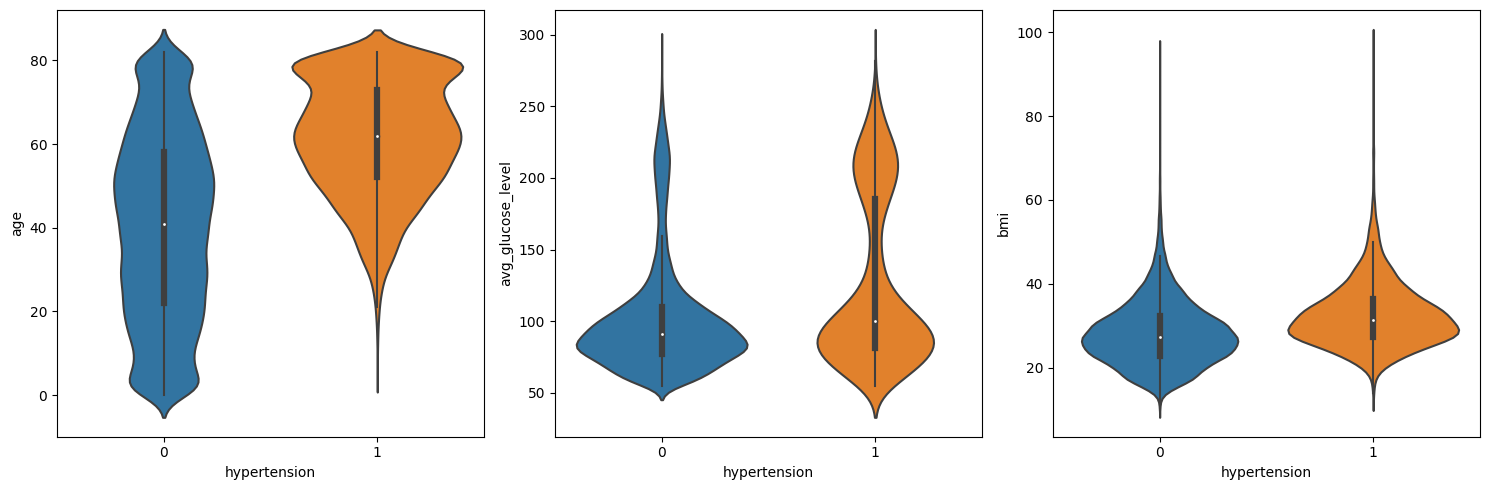

In [ ]:
# Bivariate Analysis Numeric
for key, value in categorical_dict.items():
    print(f"{key}: {value}")

while True:
    try:
        ch_n = int(input('Choose the variable to set the bivariate analysis: '))
        vr_n = categorical_dict[ch_n]
        break
    except KeyError:
        print("Invalid choice. Please enter a valid number.")

print(f"You chose: {font_size_large}{vr_n}")

fig, axs = plt.subplots(nrows=nr_num, ncols=nc_num, figsize=(nc_num * 5, nr_num * 5))

for var, subplot in zip(numeric_columns, axs.flatten()):
    sns.violinplot(x=df_usable[vr_n], y=df_usable[var], ax=subplot)

plt.tight_layout()
plt.show()


## Regression & Classification functions

### Regression function

In [ ]:
def regression(df, target, df_missing):
  # -------- Prepare dataset & Data Splitting: ----------------
  X = df.drop([target], axis=1)
  y = df[target]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  models =[]
  scores =[]

  # # ######### KNN REGRESSOR ############
  models.append(KNeighborsRegressor())
  models[-1].fit(X_train, y_train)
  scores.append(models[-1].score(X_test, y_test))
  print(f'knnr --> {scores[-1]:.2f}')

  # # ##### DecisionTree REGRESSOR ########
  models.append(DecisionTreeRegressor())
  models[-1].fit(X_train, y_train)
  scores.append(np.abs(models[-1].score(X_test, y_test)))
  print(f'dtr --> {scores[-1]:.2f}')

  # # ###### RandomForest REGRESSOR ########
  models.append(RandomForestRegressor())
  models[-1].fit(X_train, y_train)
  scores.append(models[-1].score(X_test, y_test))
  print(f'rfr --> {scores[-1]:.2f}')

  # # ###### Linear REGRESSOR ##############
  models.append(LinearRegression())
  models[-1].fit(X_train, y_train)
  scores.append(models[-1].score(X_test, y_test))
  print('lr --> ', scores[-1])

  # ////////// CHOOSE THE MODEL WITH BEST SCORE //////////////

  index = scores.index(max(scores))
  predictions = models[index].predict(df_missing)

  return predictions

### Classification function

In [ ]:
def classification(df, target, df_missing):
  # -------- Prepare dataset & Data Splitting: ----------------
  X = df.drop([target], axis=1)
  y = df[target].copy()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  models =[]
  scores =[]

  # # ######### KNN CLASSIFIER #################
  models.append(KNeighborsClassifier())
  models[-1].fit(X_train, y_train)
  scores.append(models[-1].score(X_test, y_test))
  print(f'knnc --> {scores[-1]:.2f}')

  # # ######## DecisionTree CLASSIFIER ##########
  models.append(DecisionTreeClassifier())
  models[-1].fit(X_train, y_train)
  scores.append(models[-1].score(X_test, y_test))
  print(f'dtc --> {scores[-1]:.2f}')

  # # ######## RandomForest CLASSIFIER ###########
  models.append(RandomForestClassifier())
  models[-1].fit(X_train, y_train)
  scores.append(models[-1].score(X_test, y_test))
  print(f'knnc --> {scores[-1]:.2f}')

  # ///////// CHOOSE THE MODEL WITH BEST SCORE ////////////

  index = scores.index(max(scores))
  predictions = models[index].predict(df_missing)

  return predictions


## Prepare datasets

In [ ]:
def prepare_datasets(df_usbl, col, col_type):
  # # ############## prapare dataset with missing values (to predict later) ########################
  df_missing = df_usbl.loc[df_usbl[col].isna() == True]
  df_missing.drop([col], axis=1, inplace=True)

  # # #### labelEncoder object ############
  le = LabelEncoder()

  # # ### Fit the LabelEncoder on the "Status" column and transform the values
  for obj in df_usbl.columns.difference([col]):
    df_missing[obj] = le.fit_transform(df_missing[obj])

  # # ######### prepare dataset without missing values (for training and test) #####################
  df_na = df_usbl.copy()
  df_na.dropna(subset=[col], inplace=True)

  le = LabelEncoder()
  # # ### Fit the LabelEncoder on the "Status" column and transform the values
  for obj in df_usbl.columns.difference([col]):
    df_na[obj] = le.fit_transform(df_na[obj])

  return df_missing, df_na



# RESULT

Prediction : bmi
knnr --> 0.13
dtr --> 0.49
rfr --> 0.20
lr -->  0.21647667176566654
Prediction : smoking_status
knnc --> 0.45
dtc --> 0.41
knnc --> 0.48


<Axes: >

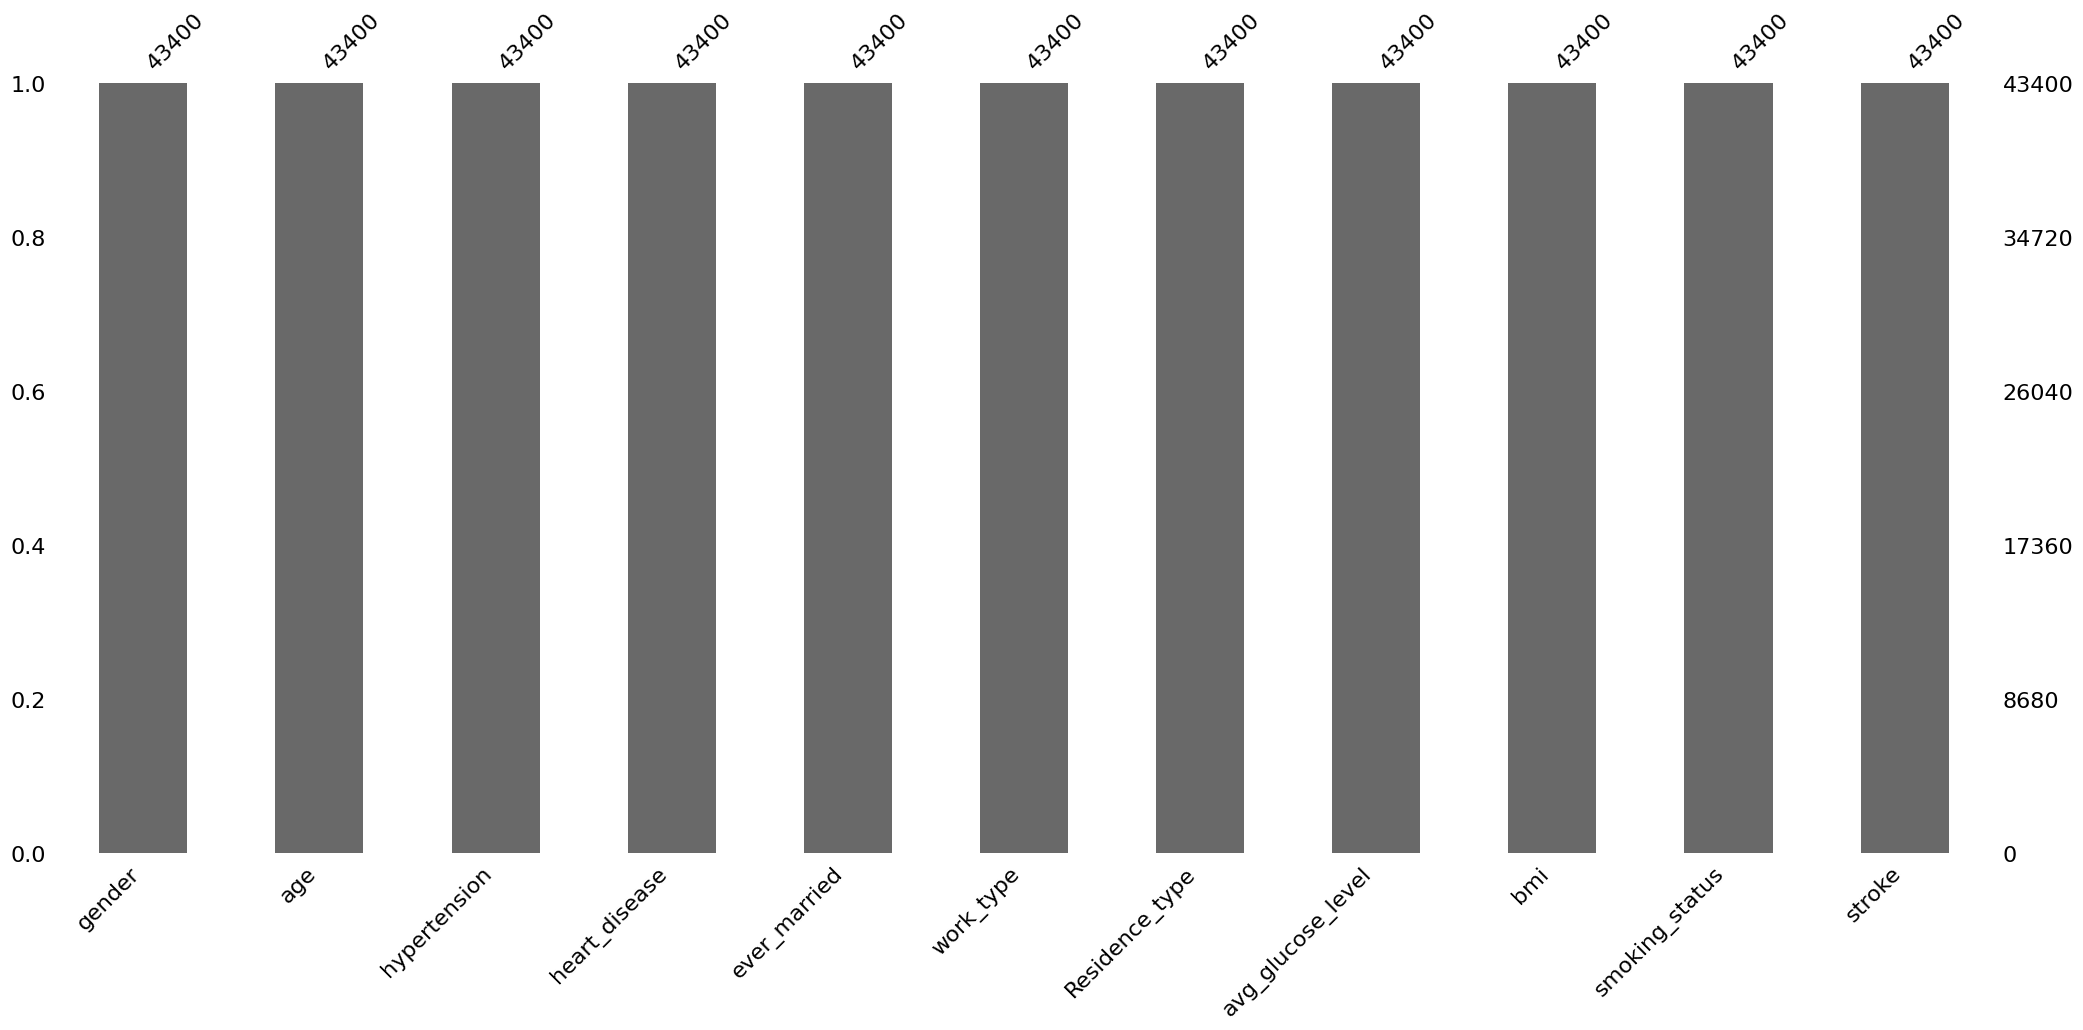

In [ ]:
import warnings
warnings.filterwarnings("ignore")

for col in columns_with_missing_values:
  print(f"Prediction : {col}")
  col_type = df[col].dtypes
  df_missing, df_na = prepare_datasets(df_usable, col, col_type)
  if col_type == np.number:
    predicted_y = regression(df_na, col, df_missing)
  if col_type == 'object':
    predicted_y = classification(df_na, col, df_missing)

  df_usable.loc[df_usable[col].isna() == True, col] = predicted_y

msno.bar(df_usable)